# Exploratory Analysis

We'd just like to see which tokens are most frequent in both glossaries, and plot the frequency distribution of words in the training set.

In [1]:
from transformers import AutoTokenizer
base_tok = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-fr")
big_tok = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-tc-big-en-fr")

In [4]:
import pandas as pd
gloss_base_freq = pd.read_csv("gloss_base_freq.txt", sep = "\t", header = None, names = ["token", "frequency"])
gloss_big_freq = pd.read_csv("gloss_big_freq.txt", sep = "\t", header = None, names = ["token", "frequency"])

In [6]:
gloss_base_freq["token_text"] = base_tok.convert_ids_to_tokens(gloss_base_freq["token"])
gloss_big_freq["token_text"] = big_tok.convert_ids_to_tokens(gloss_big_freq["token"])

In [7]:
gloss_base_freq = gloss_base_freq.sort_values(by = ["frequency"])
gloss_big_freq = gloss_big_freq.sort_values(by = ["frequency"])

In [9]:
gloss_base_freq.to_csv("base_sorted_tokens.txt", sep = "\t", header = False, index = False)
gloss_big_freq.to_csv("big_sorted_tokens.txt", sep = "\t", header = False, index = False)

<Axes: title={'center': 'Frequency plot of words in the training set'}, xlabel='Word Frequency Rank', ylabel='Log Count'>

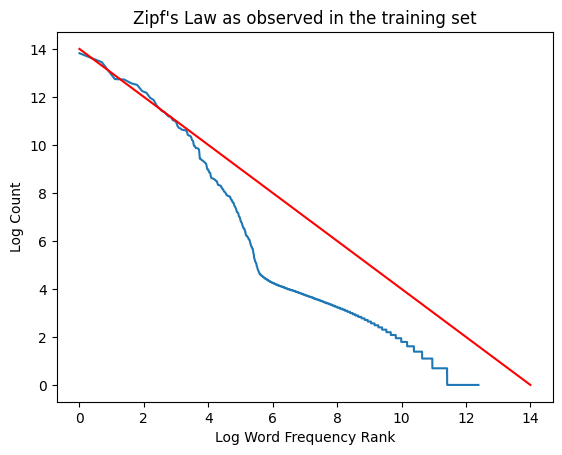

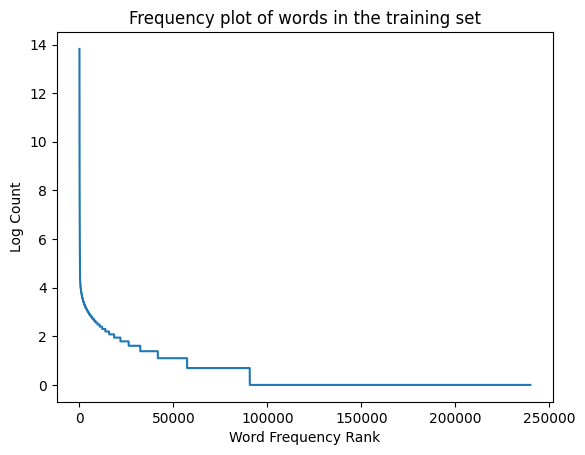

In [116]:
import numpy as np
train_word_freq = pd.read_csv("train_word_frequencies.txt", sep = "\t", header = None, names = ["word", "count"])
train_word_freq["log_count"] = np.log(train_word_freq["count"])
train_word_freq = train_word_freq.sort_values(by = ["count"], ascending = False, ignore_index = True)
train_word_freq["rank"] = train_word_freq.index + 1 #Indices begin at 0, so...
train_word_freq["log_rank"] = np.log(train_word_freq["rank"]) 
plot1 = train_word_freq.plot(x = "log_rank", y = ["log_count"], xlabel = "Log Word Frequency Rank", ylabel = "Log Count", title = "Zipf's Law as observed in the training set", legend = False)
zipfline = plot1.plot((0, 14), (14, 0), color = "red") #y = -x + 14
train_word_freq.plot(x = "rank", y = "log_count", xlabel = "Word Frequency Rank", ylabel = "Log Count", title = "Frequency plot of words in the training set", legend = False)

In [88]:
from datasets import load_dataset, Dataset
#Converts data in src [TAB] tgt [NEWLINE] format to a format suitable for model training
def convertToDictFormat(data):
    source = []
    target = []
    for example in data:
        example = example.strip()
        sentences = example.split("\t")
        source.append(sentences[0])
        target.append(sentences[1])
    ready = Dataset.from_dict({"en":source, "fr":target})
    return ready
terms_in_train = load_dataset("ethansimrm/sampled_glossary_1.0_train", split = "train")
terms_in_train_ready = convertToDictFormat(terms_in_train['text'])

Found cached dataset text (C:/Users/ethan/.cache/huggingface/datasets/ethansimrm___text/ethansimrm--sampled_glossary_1.0_train-2f618074f2b08fee/0.0.0/cb1e9bd71a82ad27976be3b12b407850fe2837d80c22c5e03a28949843a8ace2)


In [113]:
p = train_word_freq[train_word_freq["word"].isin(terms_in_train_ready['fr'])].reset_index()
len(p)

423

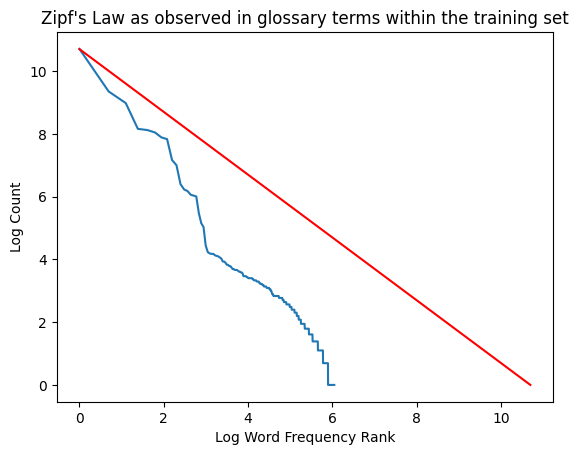

In [120]:
p["rank"] = p.index + 1
p["log_rank"] = np.log(p["rank"])
q = p.plot(x = "log_rank", y = "log_count", xlabel = "Log Word Frequency Rank", ylabel = "Log Count", title = "Zipf's Law as observed in glossary terms within the training set", legend = False)
q.plot((0, 10.7), (10.7, 0), color = "red") # y = -x + 10.7